# Simple `odsbox` example

## Read content

In [26]:
from odsbox import ConI

with ConI(url="https://docker.peak-solution.de:10032/api", auth=("Demo", "mdm")) as con_i:
    units_df = con_i.query_data({"AoUnit": {}})

    measurement = con_i.query_data({
            "MeaResult": {
                "Name": "Profile_62",
                "TestStep.Test.Name":"Campaign_05",
                "TestStep.Test.StructureLevel.Project.Name": "ElectricMotorTemperature"
                },
            "$attributes": {
                "name": 1,
                "id": 1,
                "test": {"name": 1, "parent_test": {"name": 1, "parent_test": {"name": 1, "parent_test": {"name": 1}}}},
            },
        })

    mea_dict = measurement.to_dict(orient="records")[0]
    mea_title = f"{mea_dict['Project.Name']} - {mea_dict['Test.Name']} - {mea_dict['MeaResult.Name']}"

    measurement_quantities = con_i.query({
            "AoMeasurementQuantity": {
                "measurement": mea_dict["MeaResult.Id"]
            },
            "$attributes": {
                "name": 1,
                "unit:OUTER.name": 1,
            },
        })

    mq_unit_dict = {row["name"]: row["unit:OUTER.name"] for _, row in measurement_quantities.iterrows()}

    submatrices = con_i.query({
            "AoSubMatrix": {
                "measurement": mea_dict["MeaResult.Id"]
            },
            "$attributes": {
                "id": 1,
                "number_of_rows": 1
            }
        })

    mea_bulk = con_i.bulk.data_read(submatrices["id"].iloc[0])

## Plot content

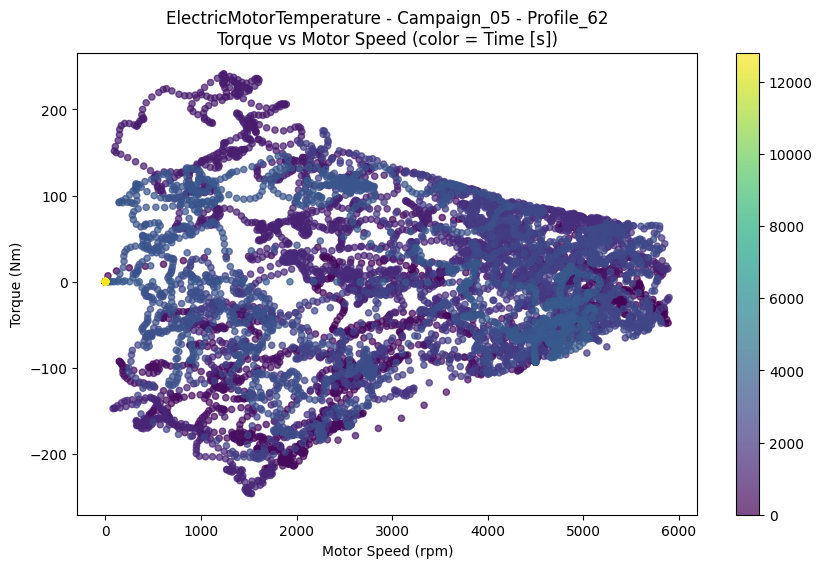

In [27]:
_ = mea_bulk.plot.scatter(
    x="Motor_speed", y="Torque", c=mea_bulk.index, colormap="viridis", figsize=(10, 6), alpha=0.7, s=20
).set(
    xlabel=f"Motor Speed ({mq_unit_dict.get('Motor_speed', '')})",
    ylabel=f"Torque ({mq_unit_dict.get('Torque', '')})",
    title=f"{mea_title}\nTorque vs Motor Speed (color = Time [{mq_unit_dict.get('Time', '')}])",
)